# HTML

- 태그는 꺾쇠 괄호로 표시
- 태그는 시작태그와 종료태그로 구성
- <태그명> 내용 </태그명>
- 태그는 속성명과 속성값이 있을 수 있다.

- 크롤링에 자주 사용되는 태그 종류
| 태그명 | 역할 |
| - | - |
| div | 구역 나누기 |
| a | 링크 |
| h1 | 제목 |
| p | 문단 |
| ul, li | 목록 |


- 태그는 <span style="color:red">부모태그</span>와 <span style="color:blue">자식태그</span>가 있다.

- 하나의 부모 태그 안에 여러 자식태그가 들어갈 수 있음.
<부모태그>
    <자식태그></자식태그>
    <자식태그></자식태그>
</부모태그>

In [1]:
import requests

# requests
- HTTP 통신을 위한 파이썬 라이브러리


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
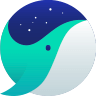
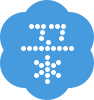

In [2]:
response = requests.get("https://www.naver.com")
html = response.text
print(html)

# BeautifulSoup

In [3]:
import requests
from bs4 import BeautifulSoup as bs

In [4]:
# naver 서버에 대화를 시도
response = requests.get("https://www.naver.com") # 요청(requests)을 보내고 응답(response)을 객체에 담음

# naver에서 html을 줌
html = response.text # 응답의 텍스트를 뽑음

# html 번역선생님으로 soup를 만듦
soup = bs(html, 'html.parser') # (html 소스코드, html 번역선생님)

# id 값이 NM_set_home_btn인 부분을 지정
word = soup.select_one("#NM_set_home_btn") # select는 여러 개의 태그, select_one은 한 개의 태그

# 텍스트 요소만 출력
print(word.text) # id는 앞에 #을 붙임 # 원하는 텍스트 요소만 추출하기 위해서는 .text

네이버를 시작페이지로


# CSS 선택자

In [5]:
import pandas as pd

- 웹사이트의 디자인을 표시하기 위한 언어
- 글자 색 변경, 폰트 크기, 가로 세로 길이 변경
- 디자인을 변경할 HTML 태그를 선택하는 것 = 크롤링할 HTML 태그를 찾는 것


- CSS 선택자의 종류
    - 태그 선택자 : 태그의 이름으로 선택한다.(ex. h1, a)
    - id 선택자 : id 값으로 선택한다.(ex. #articleBody)
    - class 선택자 : class 값으로 선택한다.(ex. info_group)
    - 자식 선택자 : 원하는 태그에 별명이 없을 때 사용, 바로 아래에 있는 태그를 선택한다.)(ex. .logo_sports > span)

- a 태그는 무수히 많이 있음. 따라서 뉴스제목을 나타내는 a 태그만을 찾아야함
- 별명에는 id와 class가 있음.(id = '#', class = '=')

In [6]:
response = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90")
html = response.text
soup = bs(html, 'html.parser')
links = soup.select('.news_tit') # 결과는 리스트

title_list = []
url_list = []

for link in links : 
    title = link.text # 태그 안에 텍스트 요소를 추출
    title_list.append(title)
    
    url = link.attrs['href'] # href의 속성값을 가져옴
    url_list.append(url)

data = {"title" : title_list, "url" : url_list}
df = pd.DataFrame(data)
df

,title,url
0,"삼성전자, 차세대 메모리 'CXL 2.0 D램' 개발…연내 양산",https://zdnet.co.kr/view/?no=20230512140323
1,"경쟁 치열한 '차량용 반도체'…삼성전자, 고객 잡기 총력전",http://www.newsis.com/view/?id=NISX20230512_00...
2,"윤 대통령, 노태문 삼성전자 사장에게 '금탑산업훈장' 수여",https://www.yna.co.kr/view/PYH2023051203130001...
3,"[뉴스의 눈]삼성전자-애플, 간편결제 전면전 시작",https://www.etnews.com/20230511000223
4,"상반기 삼성전자 공채, '이곳'이 가장 치열했다",http://www.fnnews.com/news/202305111144469529
5,"삼성전자, MZ세대 겨냥 강남 매장 오픈… 애플 견제",http://moneys.mt.co.kr/news/mwView.php?no=2023...
6,"[클릭 e종목]""삼성전자, 2Q 비중확대 적기""",https://view.asiae.co.kr/article/2023051208081...
7,"KB證 “삼성전자, 하반기 수급 개선… 목표가 8만5000원”",https://biz.chosun.com/stock/stock_general/202...
8,"삼성전자 위협하는 강력한 ‘도전자’의 등장...구글, 첫 폴더블폰 공개",https://magazine.hankyung.com/business/article...
9,"""평균 연봉 1.35억도 불만족""…해외서 불매주도 선 넘는 삼성전자 노조",http://www.inews24.com/view/1593696


In [21]:
# 과제 1 : 프로그램을 실행하면 검색어를 입력 받게 해서 해당 검색어로 크롤링 되게 만들어 보자

query = input("키워드를 입력하세요 : ")
response = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}".format(query))
html = response.text
soup = bs(html, 'html.parser')
news_tit = soup.select('.news_tit')
news_con = soup.select('div.news_wrap.api_ani_send > div > div.news_dsc')

title_list = []
contents_list = []

for newst in news_tit : 
    title = newst.text
    title_list.append(title)
    
for newsc in news_con : 
    contents = newsc.text
    contents_list.append(contents)
    
data = {"제목" : title_list, "내용" : contents_list}
df = pd.DataFrame(data)
df

키워드를 입력하세요 : 동탄


,제목,내용
0,"김동연 ""동탄 전세피해자 협동조합 설립 지원""…대책 추진",화성 동탄지역 전세 피해자의 협동조합 설립을 지원하는 등 경기도 차원의 전세피해...
1,"경찰, '동탄 전세금 사건' 공인중개사 소환조사…피해자 144명",경찰이 경기 화성 동탄신도시 '전세금 피해' 사건의 핵심 인물인 공인중개사 부부...
2,반도체 클러스터 수혜 ‘동탄 파크릭스’ 2차 무순위 계약 진행,현대건설·계룡건설산업·동부건설·대보건설이 경기도 동탄2신도시 신주거문화타운에서 ...
3,"경기도, 전세사기 피해자 협동조합 설립 지원",경기도가 대규모 전세사기 피해가 발생한 경기도 화성 동탄지역 전세사기 피해자들의...
4,전세사기 남씨 일당에 적용 ‘범죄단체죄’…동탄·구리는 미지수,그러나 경기도 화성 동탄과 구리 등 다른 지역의 전세사기 일당에게도 이런 죄가 ...
5,전 세대 완판 임박…‘동탄 파크릭스’ 2차 12일(금) 무순위 계약 진행,현대건설·계룡건설산업·동부건설·대보건설이 경기도 동탄2신도시 신주거문화타운에서 ...
6,금강주택 ‘동탄신도시 금강펜테리움 6차 센트럴파크’ 정당계약,"실제 국토교통부실거래가에 따르면, 동탄2신도시 ‘동탄역시범금강펜테리움3차’는 단..."
7,"서철모 전 화성시장, “광역급행철도 요금, 동탄 주민이 나서지않으면 안된다...",서철모 전 화성시장이 동탄이 명품도시가 되는 로드맵을 제시했다. 그는 11일 자...
8,"뜨돈, 동탄 수도권 본점 오픈",뜨돈 제공 정아름 기자 = 돈가스 프랜차이즈 브랜드 '뜨돈'이 동탄에 수도권 본...
9,동탄2신도시 입성 가능한 기회 ‘동탄 파크릭스’ 2차 무순위 청약,현대건설·계룡건설산업·동부건설·대보건설이 경기도 동탄2신도시 신주거문화타운에서 ...


In [7]:
# 과제 2 : 내가 원하는 페이지까지 크롤링해보자(ex. 10 page)
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [8]:
# 리스트 생성
news_title_list = []
news_contents_list = []

driver = webdriver.Chrome('/Users/kanovatio/chromedriver')
driver.implicitly_wait(1)

url = "https://www.naver.com/"
driver.get(url)
time.sleep(1)

# 네이버 홈페이지에서 검색시키기
query = input("검색 키워드를 입력하세요 : ")
search_box = driver.find_element(By.XPATH, '//*[@id="query"]')
search_box.send_keys(query)
search_box.send_keys(Keys.RETURN)
time.sleep(1)
news_tab = driver.find_element(By.XPATH, '//a[@class="tab"][text()="뉴스"]') # 원하는 탭을 고유 설정
news_tab.click()
print("정보 수집 시작")

# 1~10페이지 정보 자동 수집
for i in range(1, 10) : 
    news_titles = driver.find_elements(By.CSS_SELECTOR, 'div.news_wrap.api_ani_send > div > a')
    news_contents = driver.find_elements(By.CSS_SELECTOR, 'div.news_wrap.api_ani_send > div > div.news_dsc > div > a')

    for titles in news_titles : 
        title = titles.text
        news_title_list.append(title)

    for contents in news_contents : 
        content = contents.text
        news_contents_list.append(content)

    driver.find_element(By.CSS_SELECTOR, '#main_pack > div.api_sc_page_wrap > div > div > a:nth-child({})'.format(str(i))).click()
    time.sleep(1)

# 프로그램 종료    
driver.quit()    
print("정보 수집 완료")

# 데이터프레임화하기
data = {"제목" : news_title_list, "내용" : news_contents_list}
df = pd.DataFrame(data)
print("데이터의 형태 : ", df.shape)
df.to_excel(query + '_search_df.xlsx', index = False)
df

/var/folders/9t/s4kfwbj54wj1sw01v7vtb68h0000gn/T/ipykernel_4746/2105182733.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/kanovatio/chromedriver')


검색 키워드를 입력하세요 : 동탄
정보 수집 시작
정보 수집 완료
데이터의 형태 :  (90, 2)


,제목,내용
0,"경찰, 동탄 전세사기 43채 소유 부부 압수수색·소환조사","기사내용 요약 43채 오피스텔 소유 임대인, 전세금 반환 안해 동탄 전세사기 피해자..."
1,"김동연 ""동탄 전세피해자 협동조합 설립 지원 등 대책 추진""",동탄지역 전세 사기 피해자의 협동조합 설립 등 대책 강구를 시사했다. 11일 김 지...
2,"신도림 우성아파트, 1주 새 최대 '2500만원' 내려",신도시의 경우 1기 신도시 위주의 약세가 지속되는 가운데 입주 여파로 동탄·광교 등...
3,"동탄 오피스텔 44채 보유하고 파산 신청… 임대인 부부, 경찰 조사",동탄 일대 오피스텔 전세 계약 등을 위탁한 것으로 알려진 한 공인중개사무소. 사진=...
4,"경찰, '동탄 전세금 사건' 공인중개사 소환조사…피해자 144명",경찰이 경기 화성 동탄신도시 '전세금 피해' 사건의 핵심 인물인 공인중개사 부부를 ...
...,...,...
85,“동탄 1억 뛰었다” 반등온기 수도권 확산,동탄신도시에서도 1억원 안팎의 반등 거래가 이어졌다. 화성시 오산동 ‘동탄역반도유보...
86,"경찰, 화성 동탄 전세사기 관련 임대인 압수수색(종합)","경찰이 경기 화성 동탄신도시에서 발생한 전세사기 의심 사건과 관련, 강제 수사에 나..."
87,'바지사장'에 넘겨도 전세사기…동탄·구리 포함은 미지수,"임대인이 거짓말을 했거나 명의를 넘긴 경우도 전세사기로 보겠다는건데, 그래도 동탄과..."
88,"반도문화재단, 제4회 '반도 가족사랑 그림·사진 공모전' 시상식 개최",반도문화재단은 지난 6일 경기도 동탄2신도시에 위치한 복합문화공간 아이비 라운지에서...


# url
- 인터넷 주소 형식
- Protocol - Domain - Path - Parameter

https://search.naver.com/search.naver?where=news&query=삼성전자
- Protocol = http or https
- Domain = search.naver.com (IP 주소에 이름을 준 것)
- Path = search.naver (서버에서 해당 페이지의 경로)
- Parameter = where = news & query = 삼성전자({where : key, news : value}, {query : key, 삼성전자 : value})

# 반복문 사용

In [9]:
query = input("키워드를 입력하세요 : ")
print('---'*20)
lastpage = int(input("마지막 페이지 번호를 입력해주세요 : "))
print('---'*20)
for i in range(1, lastpage, 1) : 
    response = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start=".format(query,i))
    html = response.text
    soup = bs(html, 'html.parser')
    links = soup.select('.news_tit') # 결과는 리스트
    for link in links : 
        title = link.text
        url = link.attrs['href']
        print(title, url)

키워드를 입력하세요 : 삼성전자
------------------------------------------------------------
마지막 페이지 번호를 입력해주세요 : 5
------------------------------------------------------------
삼성전자, 차세대 메모리 'CXL 2.0 D램' 개발…연내 양산 https://zdnet.co.kr/view/?no=20230512140323
경쟁 치열한 '차량용 반도체'…삼성전자, 고객 잡기 총력전 http://www.newsis.com/view/?id=NISX20230512_0002300562&cID=13001&pID=13000
윤 대통령, 노태문 삼성전자 사장에게 '금탑산업훈장' 수여 https://www.yna.co.kr/view/PYH20230512031300013?input=1196m
삼성전자, MZ세대 겨냥 강남 매장 오픈… 애플 견제 http://moneys.mt.co.kr/news/mwView.php?no=2023051117563046322
[뉴스의 눈]삼성전자-애플, 간편결제 전면전 시작 https://www.etnews.com/20230511000223
상반기 삼성전자 공채, '이곳'이 가장 치열했다 http://www.fnnews.com/news/202305111144469529
[클릭 e종목]"삼성전자, 2Q 비중확대 적기" https://view.asiae.co.kr/article/2023051208081803590
KB證 “삼성전자, 하반기 수급 개선… 목표가 8만5000원” https://biz.chosun.com/stock/stock_general/2023/05/12/O6R7ANEXRNAX7MHIMDSGOF32CU/?utm_source=naver&utm_medium=original&utm_campaign=biz
삼성전자 위협하는 강력한 ‘도전자’의 등장...구글, 첫 폴더블폰 공개 https://magazine.hankyung.com/busi

# 네이버 주식 현재가 정보 수집하기

In [10]:
codes = [
    '005930','000660', '035720'
]

for code in codes : 
    url = "https://finance.naver.com/item/sise.naver?code={}".format(code)
    response = requests.get(url)
    html = response.text
    soup = bs(html, 'html.parser')
    price = soup.select_one("#_nowVal").text
    #문자열을 숫자로 변환하기 위해서는 ,가 없어야 함
    price = price.replace(',','')
    print("현재가 정보 : ", price)

현재가 정보 :  64200
현재가 정보 :  87300
현재가 정보 :  56700


# 파이썬에서 엑셀 파일 다루기 총정리

In [11]:
import openpyxl

In [12]:
# 엑셀 만들기
wb = openpyxl.Workbook()

In [13]:
# 엑셀 워크시트 만들기
ws = wb.create_sheet('오징어게임')

In [14]:
# 데이터 추가하기
ws['A1'] = "참가번호"
ws['B1'] = "성명"

ws['A2'] = 1
ws['B2'] = "오일남"

In [16]:
# 엑셀 저장하기
wb.save("참가자_data.xlsx")

In [21]:
link = '/Users/kanovatio/Gangmin Jeong/hands-on data/practice/참가자_data.xlsx'

In [22]:
# 엑셀 불러오기
wb = openpyxl.load_workbook(link)

In [23]:
# 엑셀 시트 선택
ws = wb["오징어게임"]

In [24]:
# 데이터 수정하기
ws["A3"] = 456
ws["B3"] = "성기훈"

In [25]:
wb.save(link)

# 공식문서
- 프로그램을 개발한 사람들이 사용자에게 사용법을 알려주는 사이트

In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [18]:
driver = webdriver.Chrome('/Users/kanovatio/chromedriver')
driver.get("https://www.naver.com/")

/var/folders/9t/s4kfwbj54wj1sw01v7vtb68h0000gn/T/ipykernel_4746/3382215633.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/kanovatio/chromedriver')


# 네이버 로그인 자동화

In [100]:
# 라이브러리 불러오기
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import InvalidElementStateException
import pyautogui as pag
import pyperclip
import time
import warnings

In [105]:
# 경고 무시
warnings.filterwarnings(action='ignore')

your_id = input("아이디를 입력하세요 : ")
your_pd = input("비밀번호를 입력하세요 : ")
print('---'*10)

# 웹페이지가 로딩될 때까지 5초는 기다림
driver = webdriver.Chrome('/Users/kanovatio/chromedriver')
driver.implicitly_wait(5)

# 화면 최대화
driver.maximize_window()
naver_login_url = "https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com" 

# 웹페이지 해당 주소 이동
driver.get(naver_login_url)

print("로그인을 진행합니다.")
print('---'*10)

# 아이디 입력창
naver_id = driver.find_element(By.CSS_SELECTOR, "#id")
naver_id.click()
pyperclip.copy(your_id)
pag.hotkey("command", "v")
driver.implicitly_wait(1)

# 비번 입력창
naver_pd = driver.find_element(By.CSS_SELECTOR, "#pw")
naver_pd.click()
pyperclip.copy(your_pd)
pag.hotkey("command", "v")
driver.implicitly_wait(2)

# 로그인 버튼 클릭
login_btn = driver.find_element(By.CSS_SELECTOR, "#log\.login")
login_btn.click()
driver.implicitly_wait(2)
time.sleep(1)

# 새로운 기기에서 로그인되었습니다.('등록안함' 클릭하기)
not_register = driver.find_element(By.CSS_SELECTOR, "#new\.dontsave")
not_register.click()
print("로그인이 완료되었습니다.")

아이디를 입력하세요 : dongtanyeopo
비밀번호를 입력하세요 : Huntermingu25!
------------------------------
로그인을 진행합니다.
------------------------------
로그인이 완료되었습니다.


# 쇼핑몰 상품정보 크롤링

- requests의 한계
    - 로그인이 필요한 사이트에 적용하기 어려움
    - 동적으로 HTML을 만드는 경우
        - 스크롤하거나 클릭할 경우 데이터가 생성될 때
        - URL 주소가 변경되지 않았는데 데이터가 변함
        - 표, 테이블 형태의 데이터

In [62]:
import time
import warnings
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains

In [71]:
# 경고 무시
warnings.filterwarnings(action='ignore')

# 브라우저 생성
driver = webdriver.Chrome('/Users/kanovatio/chromedriver')
driver.maximize_window()
driver.implicitly_wait(1)

# 웹사이트 열기
driver.get("https://shopping.naver.com/home")
driver.implicitly_wait(1)

# 쇼핑 상품 입력하기
query = input("검색할 상품을 입력하세요 : ")
shopping_box = driver.find_element(By.XPATH, '//*[@id="__next"]/div/div[1]/div/div/div[2]/div/div[2]/div/div[2]/form/div[1]/div/input')
shopping_box.send_keys(query)
shopping_box.send_keys(Keys.RETURN)
driver.implicitly_wait(2)

end_num = int(input('페이지 넘버를 입력하세요 : ')) + 1

for i in range(1, end_num) : 
    url = 'https://search.shopping.naver.com/search/all?origQuery={}&pagingIndex={}&query={}'.format(query, i, query)
    driver.get(url)
    driver.implicitly_wait(2)
    
    # 스크롤 전 높이 확인
    before_h = driver.execute_script("return window.scrollY")

    # 무한 스크롤 처리 방법
    while True : 
        driver.find_element(By.CSS_SELECTOR, "body").send_keys(Keys.END)

        # 스크롤 사이 페이지 로딩 시간 부여
        time.sleep(1)

        # 스크롤 후 높이
        after_h = driver.execute_script("return window.scrollY")

        if after_h == before_h : 
            break
        before_h = after_h

    name_list = []
    price_list = []
    link_list = []

    # 상품 정보 div
    items = driver.find_elements(By.CSS_SELECTOR, '.basicList_info_area__TWvzp')

    for item in items : 
        name = item.find_element(By.CSS_SELECTOR, '.basicList_title__VfX3c').text
        name_list.append(name)
        try : 
            price = item.find_element(By.CSS_SELECTOR, '.price_num__S2p_v').text
            price_list.append(price)
        except : 
            price = "판매중단"
            price_list.append(price)
        link = item.find_element(By.CSS_SELECTOR, '.basicList_title__VfX3c > a').get_attribute('href')
        link_list.append(link)

data = {"상품명" : name_list, "가격" : price_list, "원본링크" : link_list}
shopping_df = pd.DataFrame(data)
print("수집된 정보의 형태", shopping_df.shape)
shopping_df.to_excel(query + f'_df_page1-{i}.xlsx', index = False)
print('--' * 10 + "정보수집을 종료합니다" + '--' * 10)
shopping_df

검색할 상품을 입력하세요 : 감자
페이지 넘버를 입력하세요 : 2
수집된 정보의 형태 (48, 3)
--------------------정보수집을 종료합니다--------------------


,상품명,가격,원본링크
0,착한손 포슬포슬 햇 감자 하우스 수미감자 4kg 왕특 요리용,"25,800원",https://adcr.naver.com/adcr?x=XjPQopWkscfjdP9n...
1,부안동진 포슬포슬 수미감자 중/대/특 2.5kg (4월 수확 햇감자)[2.5kg],"7,900원",https://adcr.naver.com/adcr?x=k3SxQPLuYQyJ2yW+...
2,국산 무농약 생 자색 돼지감자 10kg,"39,000원",https://adcr.naver.com/adcr?x=cnhLznNcQFnZU+Y3...
3,국산 돼지감자 300g,"6,500원",https://adcr.naver.com/adcr?x=3cebO0FMaN7zLT7A...
4,업소용 대용량 흠집 감자 왕특 22년 강원도 노지 20kg,"46,990원",https://cr.shopping.naver.com/adcr.nhn?x=iFKrc...
5,[신바람 농산물] 고령 특산물 개진감자 판매 3kg 5kg 팝니다,"23,000원",https://cr.shopping.naver.com/adcr.nhn?x=qIQmY...
6,햇 감자 수미감자 두백감자 강원도감자 홍감자 3kg 5kg 10kg,"7,900원",https://cr.shopping.naver.com/adcr.nhn?x=l37jY...
7,2022년 수입감자 (특대) 20kg 업소용 (필히냉장보관) 호주산,"55,870원",https://cr.shopping.naver.com/adcr.nhn?x=AC45v...
8,국내산 카스테라 홍감자 자주감자 붉은감자 5kg 10kg 산지직송,"18,900원",https://cr.shopping.naver.com/adcr.nhn?x=30CVV...
9,강원도 수미햇감자 두백감자 왕특 가정용 업소용 1kg 3kg 5kg 10kg 20kg,"8,900원",https://cr.shopping.naver.com/adcr.nhn?x=eA%2F...
